## Arquivo e Biblioteca 

In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_excel('doncic_stats.xlsx')

**Stats Doncic Temporada 22/23:**

    - Rebotes: 8.9/jogo
    - Assistências: 8.2/jogo
    - Pontos: 33.4/jogo

In [49]:
df.head(5)

,mais_rebotes,mais_assistencias,mais_pontos,resultado
0,Yes,Yes,Yes,W
1,No,No,Yes,W
2,No,Yes,Yes,W
3,No,Yes,Yes,W
4,No,No,Yes,W


## Análise Geral dos Dados

In [50]:
df.describe()

,mais_rebotes,mais_assistencias,mais_pontos,resultado
count,48,48,48,48
unique,2,2,2,2
top,No,No,No,W
freq,24,25,25,28


**Características:**

1. Média próxima da mediana (com base na frequência de sim/não)
2. O Dallas Mavericks é um time que tem números parecidos de vitórias e derrotas (28 x 20), o que é bom para nossa análise (que poderia ser enviesada caso algum resultado fosse muito mais proeminente que outro)

## Explicação do algoritmo CART (Índice Gini)

Primeiramente, devemos calcular o índice Gini associado à coluna de resultado, conforme fórmula abaixo:

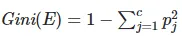

**No nosso dataframe**: Gini(E) = 1 - (28/48)^2 - (20/48)^2 = 0.486

Após isso, devemos calcular a média ponderada dos índices Gini de cada uma das features (rebotes, assistências e pontos).

Feito isso, calculamos a diferença entre o Gini do resultado e o Gini de cada uma das features - chamamos essa diferença de **ganho de informação**.

A feature com maior ganho de informação será o nosso nó raiz. A partir dele, dividiremos o nó em dois sub-nós (Yes e No) e, pra cada um deles, reiniciaremos o processo realizado anteriormente, até que todos os nós estejam completos.

## Construção do Algoritmo - Nó Principal

In [51]:
def gini(num_yes,num_no):
    valor = 1 - (num_yes/(num_yes+num_no))*(num_yes/(num_yes+num_no)) - (num_no/(num_yes+num_no))*(num_no/(num_yes+num_no))
    return valor
def gini_feature(gini_yes, gini_no, num_yes, num_no):
    return gini_yes*(num_yes/(num_yes+num_no)) + gini_no*(num_no/(num_yes+num_no))
def ganho_info(gini_principal, gini_feature):
    return gini_principal - gini_feature

In [52]:
#Quantidades - Nó Principal
resultado_yes = 28
resultado_no = 20
rebotes_yes = 24
rebotes_no = 24
assistencias_yes = 23
assistencias_no = 25
pontos_yes = 23
pontos_no = 25
#Índice Gini global
gini_resultado = gini(resultado_yes, resultado_no)

### Rebotes

In [53]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df['mais_rebotes'], columns=df['resultado'])

resultado,L,W
mais_rebotes,,
No,11,13
Yes,9,15


In [54]:
gini_rebotes = gini_feature(gini(9,15), gini(11,13),rebotes_yes, rebotes_no)
#Calculando os ganhos de informação
ganho_rebotes = ganho_info(gini_resultado, gini_rebotes)
print("O ganho de informação com rebotes é de: ", ganho_rebotes)

O ganho de informação com rebotes é de:  0.003472222222221988


### Assistências

In [55]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df['mais_assistencias'], columns=df['resultado'])

resultado,L,W
mais_assistencias,,
No,13,12
Yes,7,16


In [56]:
gini_assistencias = gini_feature(gini(7,16), gini(13,12),assistencias_yes, assistencias_no)
#Calculando os ganhos de informação
ganho_assistencias = ganho_info(gini_resultado, gini_assistencias)
print("O ganho de informação com assistências é de: ", ganho_assistencias)

O ganho de informação com assistências é de:  0.023212560386473235


### Pontos

In [57]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df['mais_pontos'], columns=df['resultado'])

resultado,L,W
mais_pontos,,
No,14,11
Yes,6,17


In [58]:
gini_pontos = gini_feature(gini(6,17), gini(14,11),pontos_yes, pontos_no)
#Calculando os ganhos de informação
ganho_pontos = ganho_info(gini_resultado, gini_pontos)
print("O ganho de informação com pontos é de: ", ganho_pontos)

O ganho de informação com pontos é de:  0.04466183574879201


Portanto, o nó principal - aquele com maior ganho de informação - é **pontos**

## Construção do Algoritmo - Nós Secundários

In [59]:
df_pontos_no = df.loc[df['mais_pontos'] == 'No']
df_pontos_yes = df.loc[df['mais_pontos'] == 'Yes']

### Nó com menos de 33.6 pontos

In [60]:
df_pontos_no.describe()

,mais_rebotes,mais_assistencias,mais_pontos,resultado
count,25,25,25,25
unique,2,2,1,2
top,No,No,No,L
freq,16,13,25,14


In [61]:
rebotes_yes_2 = 9
rebotes_no_2 = 16
assistencias_yes_2 = 12
assistencias_no_2 = 13
resultado_yes_2 = 11
resultado_no_2 = 14
#Índice Gini global
gini_resultado_2 = gini(resultado_yes_2, resultado_no_2)

#### Rebotes

In [62]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df_pontos_no['mais_rebotes'], columns=df_pontos_no['resultado'])

resultado,L,W
mais_rebotes,,
No,9,7
Yes,5,4


In [63]:
gini_rebotes_2 = gini_feature(gini(5,4), gini(9,7),rebotes_yes_2, rebotes_no_2)
#Calculando os ganhos de informação
ganho_rebotes_2 = ganho_info(gini_resultado_2, gini_rebotes_2)
print("O ganho de informação com rebotes é de: ", ganho_rebotes_2)

O ganho de informação com rebotes é de:  2.222222222220127e-05


#### Assistências

In [64]:
#Tabela de Contingência Resultado - Assistências
pd.crosstab(index=df_pontos_no['mais_assistencias'], columns=df_pontos_no['resultado'])

resultado,L,W
mais_assistencias,,
No,9,4
Yes,5,7


In [65]:
gini_assistencias_2 = gini_feature(gini(5,7), gini(9,4),assistencias_yes_2, assistencias_no_2)
#Calculando os ganhos de informação
ganho_assistencias_2 = ganho_info(gini_resultado_2, gini_assistencias_2)
print("O ganho de informação com rebotes é de: ", ganho_assistencias_2)

O ganho de informação com rebotes é de:  0.03792820512820516


Portanto, para o primeiro nó secundário, a varíavel com maior ganho de informação é **assistências**

### Nó com mais de 33.6 pontos

In [66]:
df_pontos_yes.describe()

,mais_rebotes,mais_assistencias,mais_pontos,resultado
count,23,23,23,23
unique,2,2,1,2
top,Yes,No,Yes,W
freq,15,12,23,17


In [67]:
rebotes_yes_3 = 15
rebotes_no_3 = 8
assistencias_yes_3 = 11
assistencias_no_3 = 12
resultado_yes_3 = 17
resultado_no_3 = 6
#Índice Gini global
gini_resultado_3 = gini(resultado_yes_3, resultado_no_3)

#### Rebotes

In [68]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df_pontos_yes['mais_rebotes'], columns=df_pontos_yes['resultado'])

resultado,L,W
mais_rebotes,,
No,2,6
Yes,4,11


In [69]:
gini_rebotes_3 = gini_feature(gini(4,11), gini(2,6),rebotes_yes_3, rebotes_no_3)
#Calculando os ganhos de informação
ganho_rebotes_3 = ganho_info(gini_resultado_3, gini_rebotes_3)
print("O ganho de informação com rebotes é de: ", ganho_rebotes_3)

O ganho de informação com rebotes é de:  0.0001260239445495248


#### Assistências

In [70]:
#Tabela de Contingência Resultado - Assistências
pd.crosstab(index=df_pontos_yes['mais_assistencias'], columns=df_pontos_yes['resultado'])

resultado,L,W
mais_assistencias,,
No,4,8
Yes,2,9


In [71]:
gini_assistencias_3 = gini_feature(gini(2,9), gini(4,8),assistencias_yes_3, assistencias_no_3)
#Calculando os ganhos de informação
ganho_assistencias_3 = ganho_info(gini_resultado_3, gini_assistencias_3)
print("O ganho de informação com rebotes é de: ", ganho_assistencias_3)

O ganho de informação com rebotes é de:  0.01145672223176969


Novamente, a variável com maior ganho de informação é **assistências**.

## Construção do Algoritmo - Nós Terciários

In [72]:
df_pontos_no_assists_no = df.loc[(df['mais_pontos'] == 'No') & (df['mais_assistencias'] == 'No')]
df_pontos_no_assists_yes = df.loc[(df['mais_pontos'] == 'No') & (df['mais_assistencias'] == 'Yes')]
df_pontos_yes_assists_no = df.loc[(df['mais_pontos'] == 'Yes') & (df['mais_assistencias'] == 'No')]
df_pontos_yes_assists_yes = df.loc[(df['mais_pontos'] == 'Yes') & (df['mais_assistencias'] == 'Yes')]

### Nó com menos de 33.6 pontos e menos de 8.2 assistências

In [73]:
df_pontos_no_assists_no.describe()

,mais_rebotes,mais_assistencias,mais_pontos,resultado
count,13,13,13,13
unique,2,1,1,2
top,No,No,No,L
freq,9,13,13,9


In [74]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df_pontos_no_assists_no['mais_rebotes'], columns=df_pontos_no_assists_no['resultado'])

resultado,L,W
mais_rebotes,,
No,5,4
Yes,4,0


**Conclusões:**

- Como se trata da última feature, para determinar o resultado provável (vitória ou derrota), devemos tomar o valor mais frequente.
- Pela tabela de contingência, nota-se que em ambos os casos - mais de 8.9 rebotes e menos de 8.9 rebotes, o valor mais frequente é a derrota (L)

### Nó com menos de 33.6 pontos e mais de 8.2 assistências

In [75]:
df_pontos_no_assists_yes.describe()

,mais_rebotes,mais_assistencias,mais_pontos,resultado
count,12,12,12,12
unique,2,1,1,2
top,No,Yes,No,W
freq,7,12,12,7


In [76]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df_pontos_no_assists_yes['mais_rebotes'], columns=df_pontos_no_assists_yes['resultado'])

resultado,L,W
mais_rebotes,,
No,4,3
Yes,1,4


**Conclusões:**

- Pela tabela de contingência, nota-se que, quando pontos e rebotes são abaixo da média e apenas assistência é acima, o mais provável é a derrota (L). Por outro lado, quando assistências e rebotes são acima da média e apenas pontos abaixo, 80% dos casos geram vitória (W).

### Nó com mais de 33.6 pontos e menos de 8.2 assistências

In [77]:
df_pontos_yes_assists_no.describe()

,mais_rebotes,mais_assistencias,mais_pontos,resultado
count,12,12,12,12
unique,2,1,1,2
top,Yes,No,Yes,W
freq,8,12,12,8


In [78]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df_pontos_yes_assists_no['mais_rebotes'], columns=df_pontos_yes_assists_no['resultado'])

resultado,L,W
mais_rebotes,,
No,0,4
Yes,4,4


**Conclusões:**

- Pela tabela de contingência, nota-se que, quando pontos é acima da média e assistências e rebotes abaixo, Dallas costuma se sair vitorioso. Por outro lado, não é possível concluir qual o resultado esperado quando pontos e rebotes são acima da média e assistência é abaixo.

### Nó com mais de 33.6 pontos e mais de 8.2 assistências

In [79]:
df_pontos_yes_assists_yes.describe()

,mais_rebotes,mais_assistencias,mais_pontos,resultado
count,11,11,11,11
unique,2,1,1,2
top,Yes,Yes,Yes,W
freq,7,11,11,9


In [80]:
#Tabela de Contingência Resultado - Rebote
pd.crosstab(index=df_pontos_yes_assists_yes['mais_rebotes'], columns=df_pontos_yes_assists_yes['resultado'])

resultado,L,W
mais_rebotes,,
No,2,2
Yes,0,7


**Conclusões:**

- Pela tabela de contingência, nota-se que, quando pontos, rebotes e assistências são acima da média, Dallas sempre sai vitorioso. Por outro lado, não é possível concluir qual o resultado esperado quando pontos e assistências são acima da média e rebotes é abaixo.

## Visualização da Decision Tree

In [108]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from  io import StringIO
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.optimize as opt

In [104]:
df_viz = df.replace({'Yes': 0, 'No':1})

In [105]:
X_viz = df_viz[['mais_rebotes','mais_assistencias','mais_pontos']]
y_viz = df_viz['resultado']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_viz, y_viz, test_size=0.000001, random_state=3)
DecisionTree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
DecisionTree.fit(X_train,y_train)
y_previsto = DecisionTree.predict(X_test)

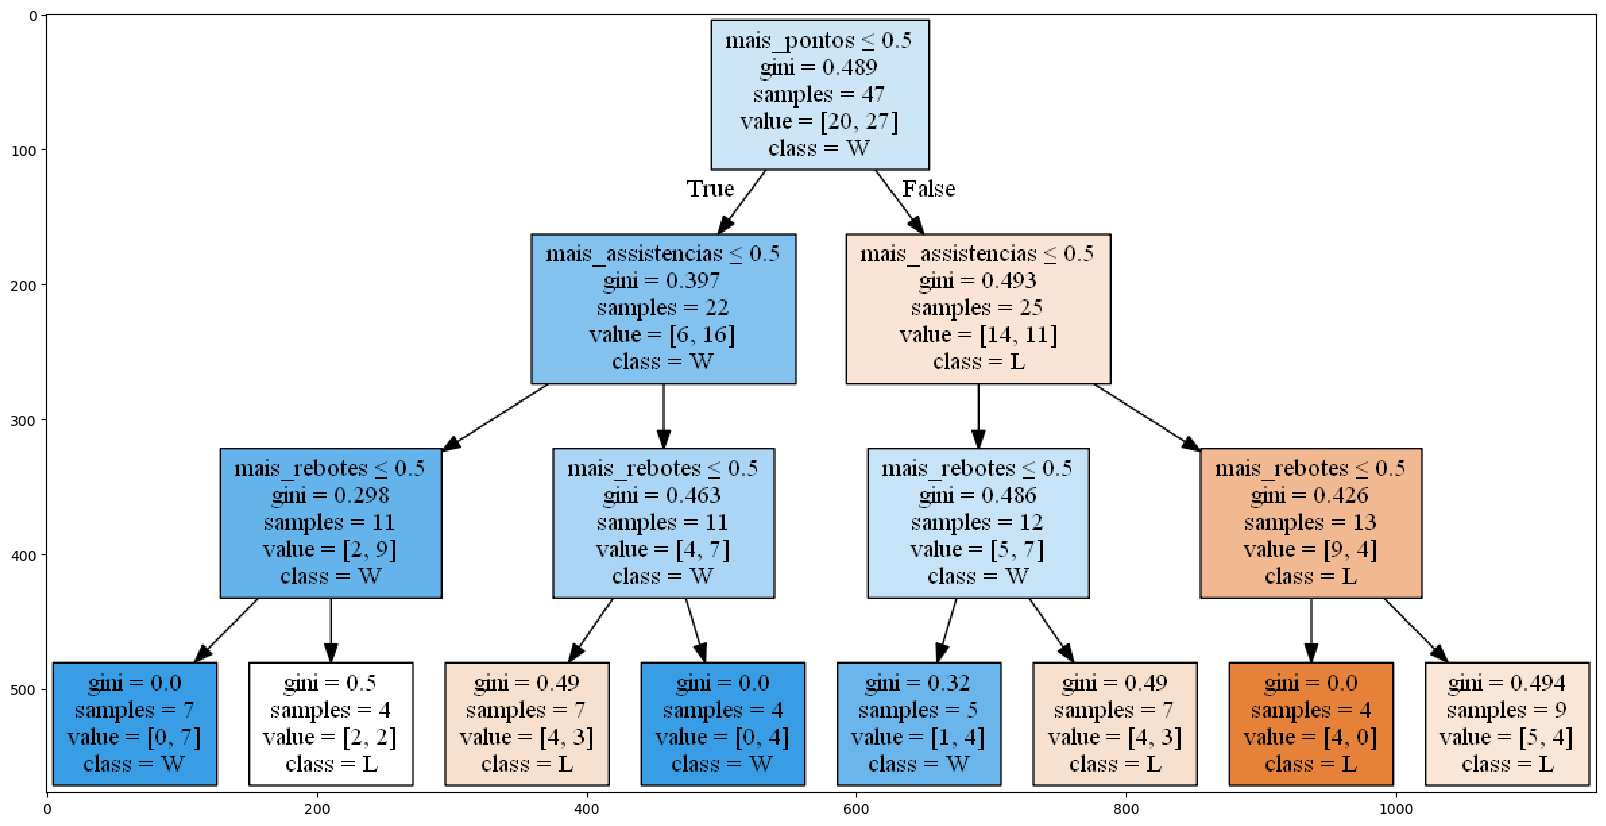

In [107]:
dot_data = StringIO()
filename = "decisiontree.png"
featureNames = df_viz.columns[0:3]
out=tree.export_graphviz(DecisionTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img,interpolation='nearest')

## Comparação com modelo do scikit-learn

In [109]:
df_2 = df.replace({'Yes': 0, 'No':1})

In [110]:
X = df_2[['mais_rebotes','mais_assistencias','mais_pontos']]
y = df_2['resultado']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=3)
DecisionTree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
DecisionTree.fit(X_train,y_train)
y_previsto = DecisionTree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_previsto)
print(f"A acurácia da árvore de decisão é de: {accuracy*100:.2f}%")

A acurácia da árvore de decisão é de: 57.14%


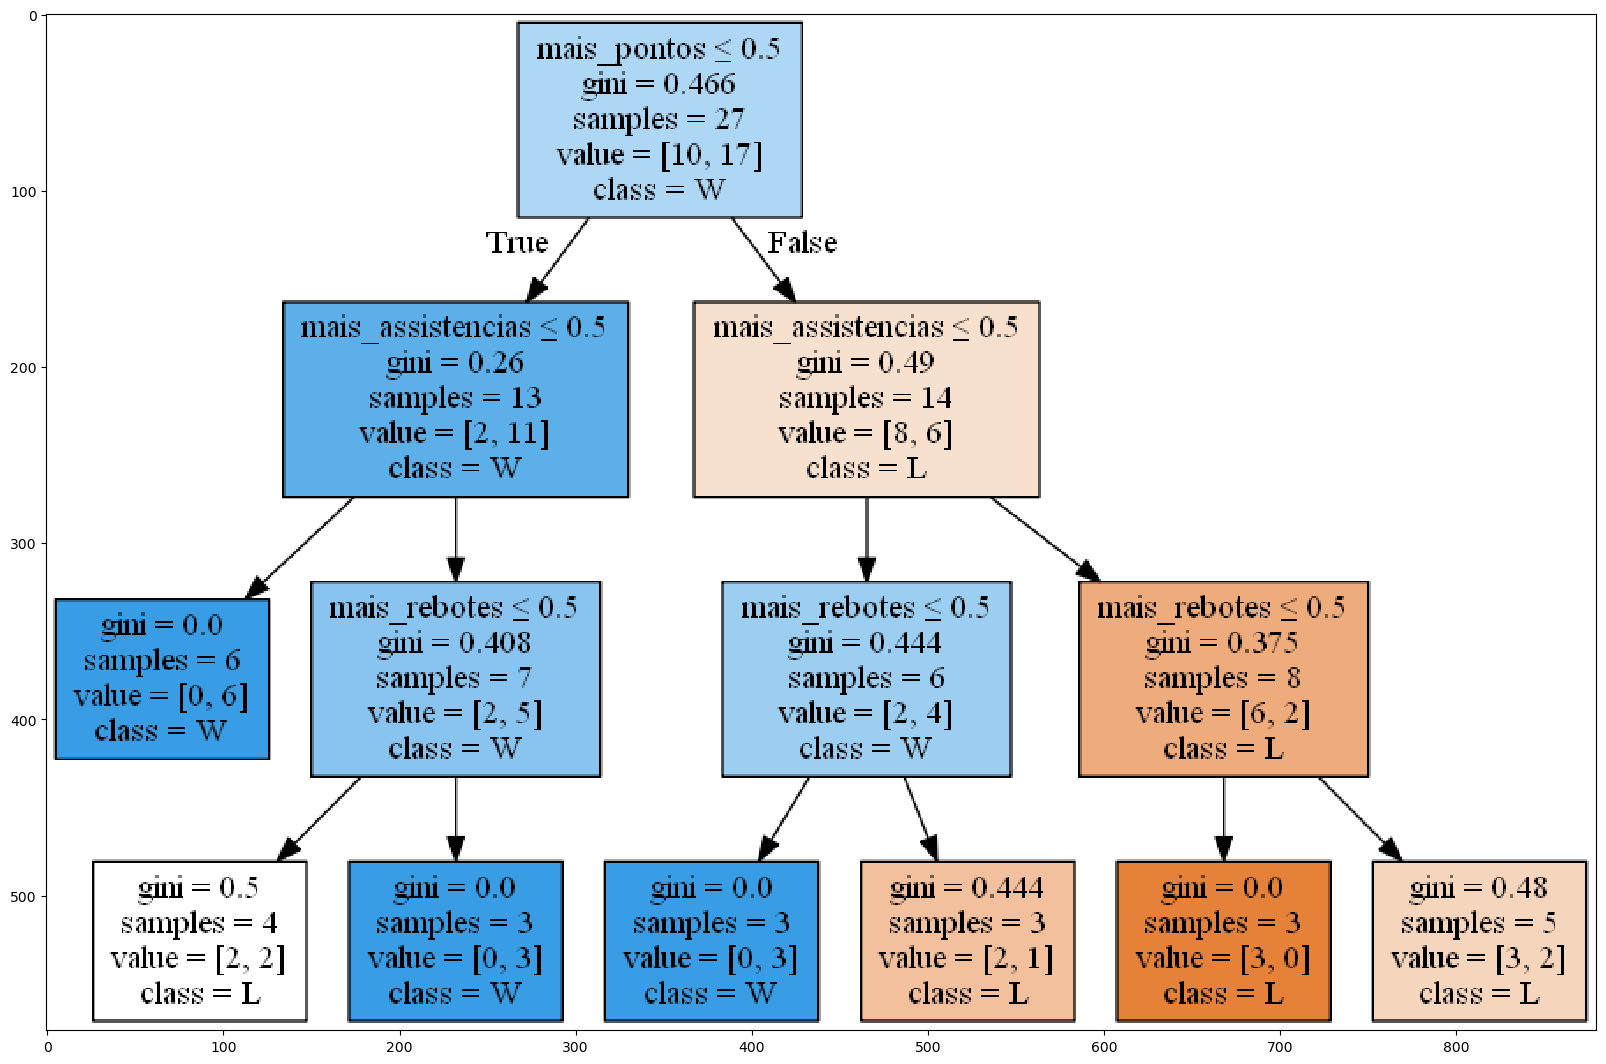

In [114]:
dot_data = StringIO()
filename = "decisiontree.png"
featureNames = df_2.columns[0:3]
out=tree.export_graphviz(DecisionTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img,interpolation='nearest')

**Semelhanças e Diferenças entre o modelo feito à mão e o modelo feito no Scikit-Learn:**
1. No modelo feito à mão, não foi feito o train-test split, enquanto no modelo do scikit-learn tal ação foi feita, deixando 58% da amostra para treino e 42% para teste.
2. Apesar dessa diferença, os resultados encontrados foram bastante semelhantes. Basicamente, a única diferença de resultado observada ocorreu quando Doncic fez mais de 33,6 pontos e mais de 8,2 assistências, mas não superou sua média de rebotes: no primeiro modelo, o resultado esperado é derrota; já no segundo modelo, o resultado esperado é que a equipe Dallas saia vitoriosa. Em todos os outros 7 casos, os "palpites" dos dois modelos são os mesmos